## 1 傅里叶变换的理论基础 

傅里叶：任何连续周期信号，可以由一组适当的正弦曲线组合而成。

时域与频域可逆

相位：跟时间差有关，不是同时开始的一组余弦函数，在叠加时要体现开始的时间

## 2 numpy实现傅里叶变换函数
1)函数numpy.fft.fft2:实现傅里叶变换，返回一个复数数组(complex ndarray)

2)函数numpy.fft.fftshift:1）得到的低频位于左上角，不便于观察，需要将低频移到频谱中心

3）20*np.log(np.abs(fshift):2）得到的是复数数组，无法通过图像展示出来，需要將其转换成灰度图像，將值映射到0～255

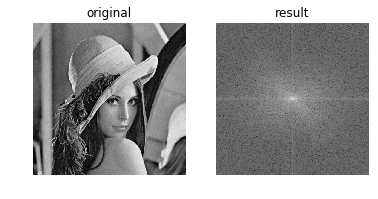

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img = cv2.imread("./image/lena.bmp",0)
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
result = 20*np.log(np.abs(fshift))
plt.subplot(121)
plt.imshow(img,cmap='gray')
plt.title('original')
plt.axis('off')
plt.subplot(122)
plt.imshow(result,cmap='gray')
plt.title('result')
plt.show()

注意：

1）傅里叶得到低频、高频信息，针对低频、高频处理能够实现不同的目的

2）傅里叶过程是可逆的，图像经过傅里叶变换，逆傅里叶变换后，能够恢复到原始图像，可能会有点失真

3）在频域对图像进行处理，在频域的处理会反映到逆变换图像上

## 3 numpy实现逆傅里叶变换
傅里叶变换和逆变换的目的：找出高频和低频，在频域内对图像进行不同的处理，然后通过逆傅里叶变换，恢复到原始的图像，此时的图像已经被处理。

1）numpy.fft.ifft2:numpy.fft.fft2的逆函数，返回一个复数数组(complex ndarray)

2）numpy.fft.ifftshift:numpy.fft.fftshift的逆函数，，即將低频由中心移到左上角。

3）np.abs:复数数组无法显示图像，需要将其转换为灰度图像，即0～255

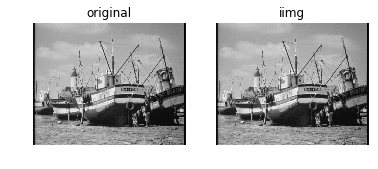

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img = cv2.imread("./image/boat.bmp",0)
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
ishift = np.fft.ifftshift(fshift)
iimg = np.fft.ifft2(ishift)
iimg = np.abs(iimg)
plt.subplot(121)
plt.imshow(img,cmap='gray')
plt.title('original')
plt.axis('off')
plt.subplot(122)
plt.imshow(iimg,cmap='gray')
plt.title('iimg')
plt.axis('off')
plt.show()

## 4 在频域进行高通滤波

低频：对应图像内变化变化缓慢的灰度分量。例如，在一幅大草原的图像中，低频对应着广袤的颜色趋于一致的草原

高频：对应图像内变化越来越块的灰度分量，是由灰度的尖锐过渡造成的。例如，在一幅大草原的图像中，其中狮子的边缘等信息

滤波：接受（通过）或者拒绝一定频率的分量

低通滤波器：通过低频，將模糊一幅图像

高通滤波器：通过高频，將增强尖锐的部分，而丢失掉细节，从而导致图像的对比度降低

rows,cols = img.shape

crow,ccol = int(rows/2),int(cols/2)

fshift[crow-30:crow+30,ccol-30:ccol+30]=0 #將中间部分设为0,由于中间位置为低频部分，相当于过滤掉了，只剩下高频

频域滤波：利用傅里叶变换从空域变换到频域，求出低频和高频，进行一些图像处理，以达到一些特殊目的，然后逆傅里叶变化从频域转换到时域，將图像处理的结果反映到原始图像上。而不是像之前那样直接在原始图像上进行图像处理。

特殊目的：图像增强、图像去噪、边缘检测、特征提取、压缩、加密等。

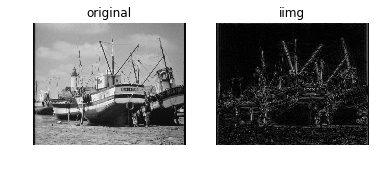

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img = cv2.imread("./image/boat.bmp",0)
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
rows,cols = img.shape
crow,ccol = int(rows/2),int(cols/2)
fshift[crow-30:crow+30,ccol-30:ccol+30] = 0
ishift = np.fft.ifftshift(fshift)
iimg = np.fft.ifft2(ishift)
iimg = np.abs(iimg)
plt.subplot(121)
plt.imshow(img,cmap='gray')
plt.title('original')
plt.axis('off')
plt.subplot(122)
plt.imshow(iimg,cmap='gray')
plt.title('iimg')
plt.axis('off')
plt.show()

## 5 opencv实现傅里叶变换
1)返回结果=cv2.dft(原始图像，转换标识）

返回结果：双通道，第1个通道为实数部分，第2个通道为虚数部分

原始图像：输入图像要首先转换为np.float32格式,一般图像为8为位图，需要使用np.float32(img)转换

转换标识：flags=cv2.DFT_COMPLEX_OUTPUT,输出一个复数矩阵

2）numpy.fft.fftshift:將低频分量移到频谱中心

3）返回值=cv2.magnitude(参数1,参数2）:2)得到的是复数矩阵，需要转换成灰度图像，即0～255，才能显示

参数1：浮点型x坐标值，即实部

参数2：浮点型y坐标值，即虚部

dst=x^2+y^2

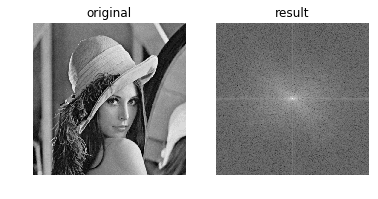

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img = cv2.imread("./image/lena.bmp",0)
dft =cv2.dft(np.float32(img),flags=cv2.DFT_COMPLEX_OUTPUT) #输出复数型式
dftshift = np.fft.fftshift(dft)
result = 20*np.log(cv2.magnitude(dftshift[:,:,0],dftshift[:,:,1]))
plt.subplot(121)
plt.imshow(img,cmap='gray')
plt.title('original')
plt.axis('off')
plt.subplot(122)
plt.imshow(result,cmap='gray')
plt.title('result')
plt.axis('off')
plt.show()

## 6 opencv实现逆傅里叶变换 
1）返回结果=cv2.idft(原始图像)：dft的逆函数

返回结果：取决于原始数据的类型和大小

原始数据：实数或复数均可

2）numpy.fft.ifftshift:fftshift的逆函数

3）返回值=cv2.magnitude(参数1,参数2）

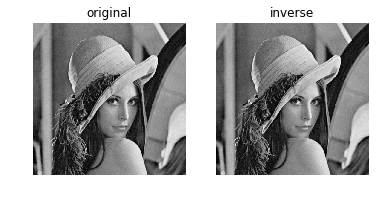

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img = cv2.imread("./image/lena.bmp",0)
dft = cv2.dft(np.float32(img),flags=cv2.DFT_COMPLEX_OUTPUT)
dftshift = np.fft.fftshift(dft)
ishift = np.fft.ifftshift(dftshift)
iimg = cv2.idft(ishift)
iimg = cv2.magnitude(iimg[:,:,0],iimg[:,:,1])
plt.subplot(121)
plt.imshow(img,cmap='gray')
plt.title('original')
plt.axis('off')
plt.subplot(122)
plt.imshow(iimg,cmap='gray')
plt.title('inverse')
plt.axis('off')
plt.show()

## 7 在频域进行低通滤波

將中间区域的像素设为1,即透明的，其它区域设为0,不透明的

rows,cols=img.shape

crow,ccol=int(rows/2),int(cols/2)

mask=np.zeros((rows,cols,2),np.uint8)

mask[crow-30:crow+30,ccol-30:ccol+30]=1


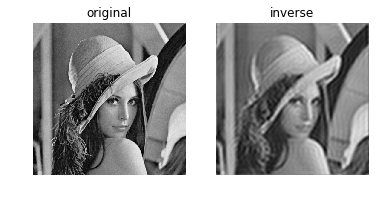

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img = cv2.imread("./image/lena.bmp",0)
dft = cv2.dft(np.float32(img),flags=cv2.DFT_COMPLEX_OUTPUT)
dftshift = np.fft.fftshift(dft)
rows,cols = img.shape
crow,ccol = int(rows/2),int(cols/2)
mask = np.zeros((rows,cols,2),np.uint8) #注意：dftshift是二通道的，mask也需要设置为二通道的
mask[crow-30:crow+30,ccol-30:ccol+30]=1
fshift = dftshift*mask
ishift = np.fft.ifftshift(fshift)
iimg = cv2.idft(ishift)
iimg = cv2.magnitude(iimg[:,:,0],iimg[:,:,1])
plt.subplot(121)
plt.imshow(img,cmap='gray')
plt.title('original')
plt.axis('off')
plt.subplot(122)
plt.imshow(iimg,cmap='gray')
plt.title('inverse')
plt.axis('off')
plt.show()

In [7]:
dftshift.shape

(512, 512, 2)